In [30]:
import pandas as pd
import numpy as np
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline

In [31]:
df = pd.read_csv('us_house_Sales_data.csv')

In [32]:
df.head()

,Price,Address,City,Zipcode,State,Bedrooms,Bathrooms,Area (Sqft),Lot Size,Year Built,Days on Market,Property Type,MLS ID,Listing Agent,Status,Listing URL
0,"$554,217","5926 Oak Ave, San Diego, CA 65383",San Diego,65383,CA,1 bds,3 ba,772 sqft,4757 sqft,1959,101,Townhouse,Z104635,Alex Johnson - Compass,For Sale,https://www.zillow.com/homedetails/80374762_zpid/
1,"$164,454","9583 Oak Ave, Fresno, IL 79339",Fresno,79339,IL,1 bds,1 ba,2348 sqft,3615 sqft,1969,46,Apartment,Z535721,Emily Davis - Century 21,Sold,https://www.zillow.com/homedetails/86143665_zpid/
2,"$1,249,331","8224 Oak Ave, Sacramento, TX 87393",Sacramento,87393,TX,6 bds,1 ba,3630 sqft,9369 sqft,1990,59,Townhouse,Z900458,Mike Lee - Coldwell Banker,For Sale,https://www.zillow.com/homedetails/37082403_zpid/
3,"$189,267","232 Oak Ave, Fresno, TX 38666",Fresno,38666,TX,2 bds,1 ba,605 sqft,8804 sqft,1958,119,Apartment,Z318589,John Doe - RE/MAX,Pending,https://www.zillow.com/homedetails/39318132_zpid/
4,"$465,778","5446 Pine Rd, Los Angeles, CA 23989",Los Angeles,23989,CA,3 bds,2 ba,1711 sqft,9260 sqft,2020,26,Townhouse,Z899716,John Doe - RE/MAX,Pending,https://www.zillow.com/homedetails/22454634_zpid/


In [33]:
df.shape

(3000, 16)

In [34]:
df.isnull().sum()

Price             0
Address           0
City              0
Zipcode           0
State             0
Bedrooms          0
Bathrooms         0
Area (Sqft)       0
Lot Size          0
Year Built        0
Days on Market    0
Property Type     0
MLS ID            0
Listing Agent     0
Status            0
Listing URL       0
dtype: int64

In [35]:
df.duplicated().sum()

0

In [36]:
df.columns

Index(['Price', 'Address', 'City', 'Zipcode', 'State', 'Bedrooms', 'Bathrooms',
       'Area (Sqft)', 'Lot Size', 'Year Built', 'Days on Market',
       'Property Type', 'MLS ID', 'Listing Agent', 'Status', 'Listing URL'],
      dtype='object')

In [37]:
df = df[['Price','City','Bedrooms','Bathrooms','Area (Sqft)', 'Lot Size', 'Year Built', 'Days on Market','Property Type']]

In [38]:
df.head()

,Price,City,Bedrooms,Bathrooms,Area (Sqft),Lot Size,Year Built,Days on Market,Property Type
0,"$554,217",San Diego,1 bds,3 ba,772 sqft,4757 sqft,1959,101,Townhouse
1,"$164,454",Fresno,1 bds,1 ba,2348 sqft,3615 sqft,1969,46,Apartment
2,"$1,249,331",Sacramento,6 bds,1 ba,3630 sqft,9369 sqft,1990,59,Townhouse
3,"$189,267",Fresno,2 bds,1 ba,605 sqft,8804 sqft,1958,119,Apartment
4,"$465,778",Los Angeles,3 bds,2 ba,1711 sqft,9260 sqft,2020,26,Townhouse


In [39]:
# Remove 'sqft','bds' and 'ba' and convert to numeric
df['Area (Sqft)'] = df['Area (Sqft)'].str.replace('sqft', '', regex=False).astype(int)
df['Lot Size'] = df['Lot Size'].str.replace('sqft', '', regex=False).astype(int)
df['Bedrooms'] = df['Bedrooms'].str.replace('bds', '', regex=False).astype(int)
df['Bathrooms'] = df['Bathrooms'].str.replace('ba', '', regex=False).astype(int)

# Remove '$' and ',' and convert to numeric
df['Price'] = df['Price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           3000 non-null   float64
 1   City            3000 non-null   object 
 2   Bedrooms        3000 non-null   int32  
 3   Bathrooms       3000 non-null   int32  
 4   Area (Sqft)     3000 non-null   int32  
 5   Lot Size        3000 non-null   int32  
 6   Year Built      3000 non-null   int64  
 7   Days on Market  3000 non-null   int64  
 8   Property Type   3000 non-null   object 
dtypes: float64(1), int32(4), int64(2), object(2)
memory usage: 164.2+ KB


In [41]:
df['City'].value_counts()

City
Los Angeles      617
Sacramento       609
San Francisco    605
San Diego        586
Fresno           583
Name: count, dtype: int64

In [42]:
df['Property Type'].value_counts()

Property Type
Apartment        622
Condo            617
Townhouse        614
Single Family    583
Multi-Family     564
Name: count, dtype: int64

In [43]:
'''
mapping = {
    'Apartment': 0,
    'Condo': 1,
    'Townhouse': 2,
    'Single Family': 3,
    'Multi-Family': 4
}
selected_columns['Property Type'] = selected_columns['Property Type'].map(mapping)
'''
df = pd.get_dummies(df, columns=['Property Type'], prefix='Type', drop_first=True)

In [44]:
'''
city_freq = {
    'Los Angeles': 617,
    'Sacramento': 609,
    'San Francisco': 605,
    'San Diego': 586,
    'Fresno': 583
}

selected_columns['City'] = selected_columns['City'].map(city_freq)
'''
df = pd.get_dummies(df, columns=['City'], prefix='City', drop_first=True)

In [45]:
df.head()

,Price,Bedrooms,Bathrooms,Area (Sqft),Lot Size,Year Built,Days on Market,Type_Condo,Type_Multi-Family,Type_Single Family,Type_Townhouse,City_Los Angeles,City_Sacramento,City_San Diego,City_San Francisco
0,554217.0,1,3,772,4757,1959,101,False,False,False,True,False,False,True,False
1,164454.0,1,1,2348,3615,1969,46,False,False,False,False,False,False,False,False
2,1249331.0,6,1,3630,9369,1990,59,False,False,False,True,False,True,False,False
3,189267.0,2,1,605,8804,1958,119,False,False,False,False,False,False,False,False
4,465778.0,3,2,1711,9260,2020,26,False,False,False,True,True,False,False,False


In [46]:
# Step 1: Create sample DataFrame

# df = pd.DataFrame(data)

# Step 2: Feature and Target split
X = df.drop('Price', axis=1)
y = df['Price']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 4: Standard Scaler (for numeric features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
# Step 5: Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    #'XGBoost': XGBRegressor(random_state=42, verbosity=0)
}

In [48]:
# Step 6: Fit and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    print(f"\n{name} Results:")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):,.2f}")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")


Linear Regression Results:
Mean Squared Error (MSE): 166,694,798,375.64
R² Score: -0.0212

Random Forest Results:
Mean Squared Error (MSE): 173,543,498,277.79
R² Score: -0.0631

Gradient Boosting Results:
Mean Squared Error (MSE): 170,317,792,369.86
R² Score: -0.0434


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

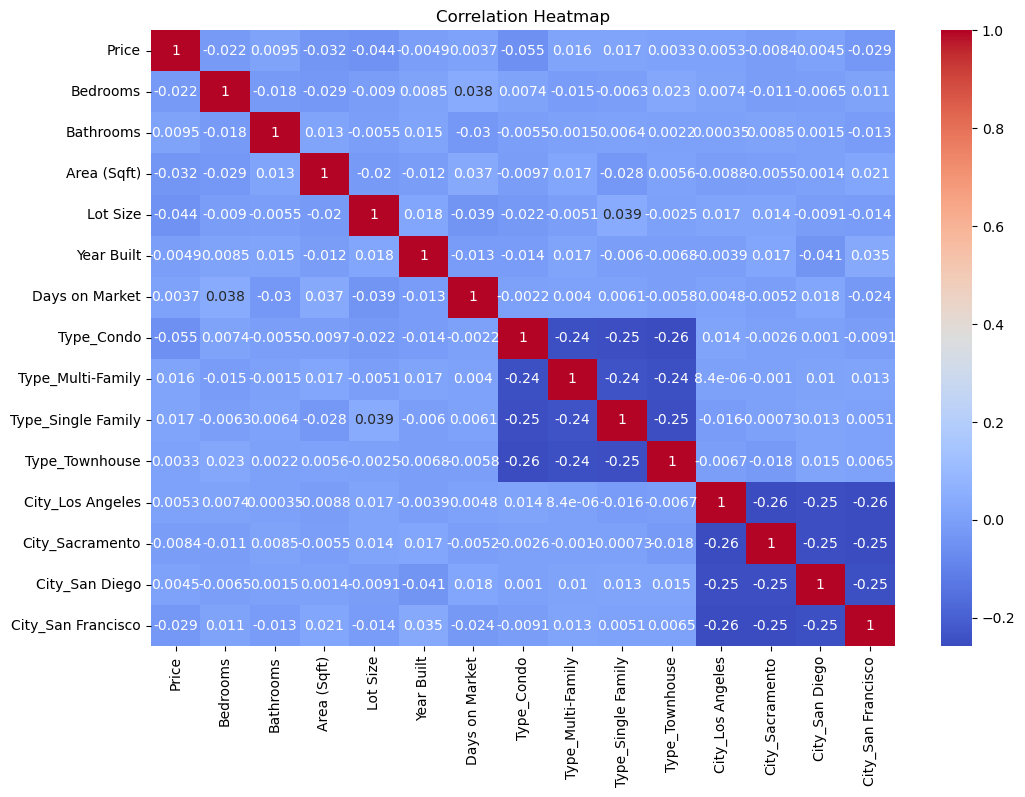

In [50]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Results are not upto the mark because of Synthetic Dataset